In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 读取数据
data = pd.read_csv("../data/dataset.csv")
data['target_class'] = pd.qcut(data['Cs'], q=10, labels=False)
X = data.drop(['Cs', 'target_class'], axis=1)
y = data['Cs']
stratify_column = data['target_class']

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

In [2]:
from lightgbm import LGBMRegressor

# 训练LightGBM回归模型
lgbm = LGBMRegressor(
    colsample_bytree=0.25,
    learning_rate=0.05,
    max_depth=17,
    min_child_samples=11,
    n_estimators=900,
    num_leaves=139,
    reg_alpha=0.36,
    reg_lambda=0.2,
    subsample=0.6,
    random_state=21
)

lgbm.fit(X_train, y_train)

y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 12
[LightGBM] [Info] Start training from score 93.467937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

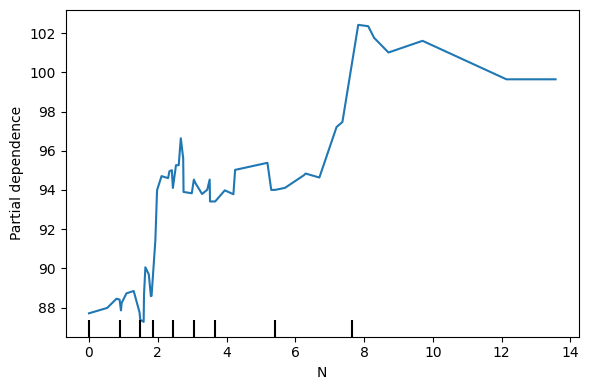

In [3]:
from function import show_partial_denpendence

# 指定要绘制部分依赖图的特征
feature_name = 'N'
show_partial_denpendence(lgbm, X_train, feature_name)

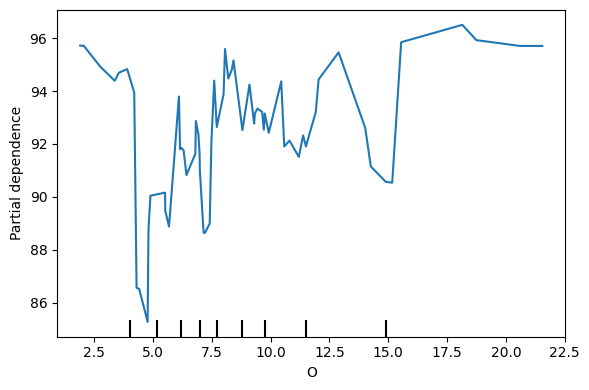

In [4]:
# 指定要绘制部分依赖图的特征
feature_name = 'O'
show_partial_denpendence(lgbm, X_train, feature_name)

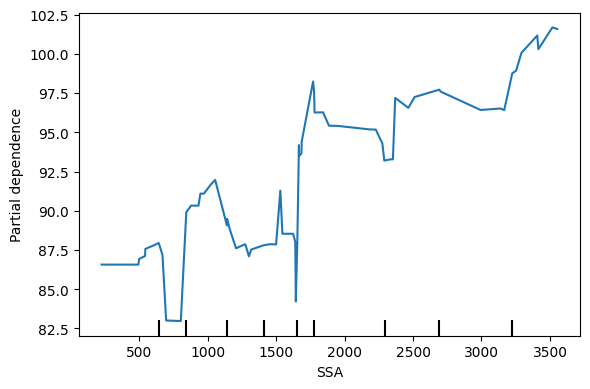

In [5]:
# 指定要绘制部分依赖图的特征
feature_name = 'SSA'
show_partial_denpendence(lgbm, X_train, feature_name)

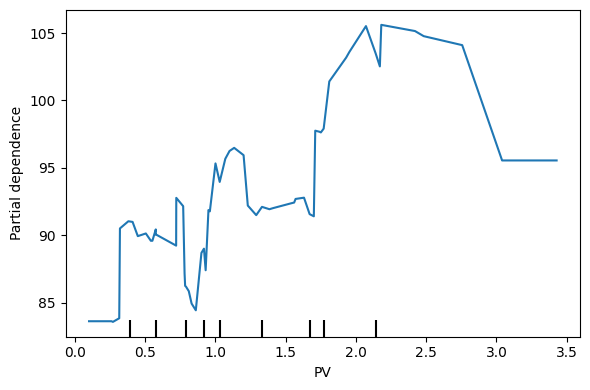

In [6]:
# 指定要绘制部分依赖图的特征
feature_name = 'PV'
show_partial_denpendence(lgbm, X_train, feature_name)

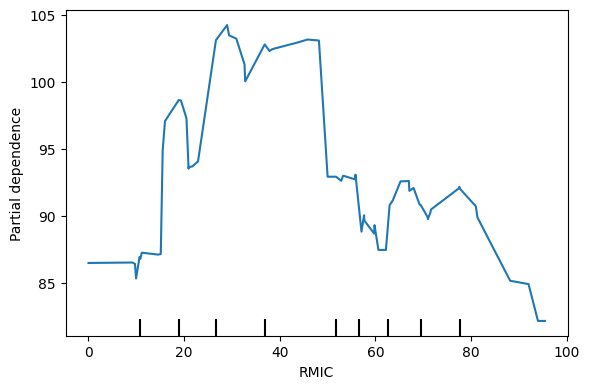

In [7]:
# 指定要绘制部分依赖图的特征
feature_name = 'RMIC'
show_partial_denpendence(lgbm, X_train, feature_name)

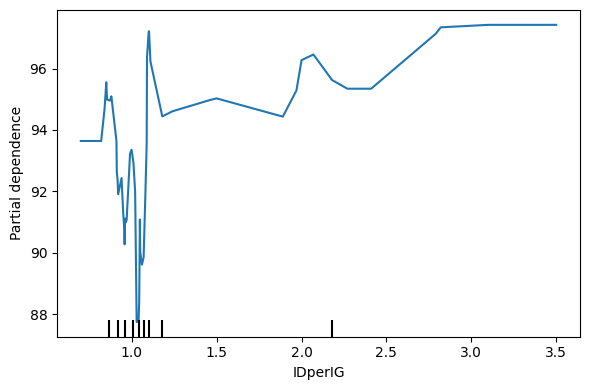

In [8]:
# 指定要绘制部分依赖图的特征
feature_name = 'IDperIG'
show_partial_denpendence(lgbm, X_train, feature_name)

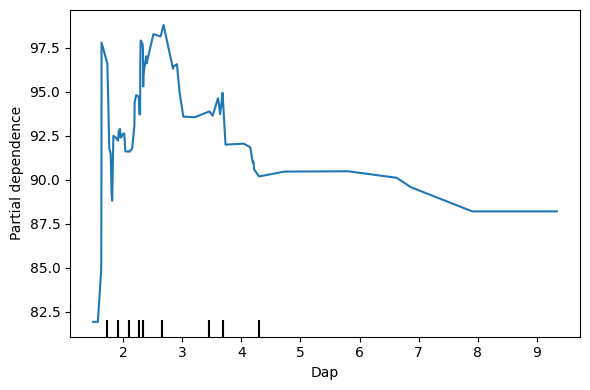

In [9]:
# 指定要绘制部分依赖图的特征
feature_name = 'Dap'
show_partial_denpendence(lgbm, X_train, feature_name)